In [0]:
import numpy as nm
import pandas as pd

import matplotlib.pyplot as plt

In [250]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
#train=train.append(test, ignore_index=True)
train.shape

(1460, 81)

In [251]:
train.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [252]:
b=nm.array([])
a=nm.array([])
for i in train:
  if(train[i].dtypes=='object'):
    b=nm.append(b,i)
  elif(train[i].dtypes!='object'):
    a=nm.append(a,i)
print(b)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


In [0]:
c=nm.array([])
for i in train:
  if(train[i].isnull().sum()>200):
    if(train[i].dtypes=='object'):
      c=nm.append(c,i)
      

In [254]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values="NaN", strategy="median")
for i in a:
  train[i]=imp.fit_transform(train[[i]]).ravel()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


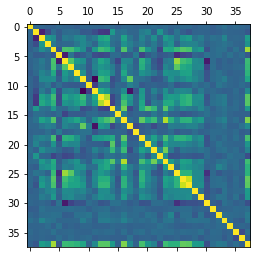

In [255]:

plt.matshow(train.corr())
#from pandas.plotting import scatter_matrix as sm
#sm(train)




In [0]:
for i in c:
  del train[i]


In [0]:
train=train.dropna(how='any')

In [0]:
d=nm.array([])
for i in train:
  if(train[i].dtypes=='object'):
    d=nm.append(d,i)

In [0]:
train.head
train=pd.get_dummies(train,prefix=d)



In [260]:
train.dtypes

Id                       float64
MSSubClass               float64
LotFrontage              float64
LotArea                  float64
OverallQual              float64
OverallCond              float64
YearBuilt                float64
YearRemodAdd             float64
MasVnrArea               float64
BsmtFinSF1               float64
BsmtFinSF2               float64
BsmtUnfSF                float64
TotalBsmtSF              float64
1stFlrSF                 float64
2ndFlrSF                 float64
LowQualFinSF             float64
GrLivArea                float64
BsmtFullBath             float64
BsmtHalfBath             float64
FullBath                 float64
HalfBath                 float64
BedroomAbvGr             float64
KitchenAbvGr             float64
TotRmsAbvGrd             float64
Fireplaces               float64
GarageYrBlt              float64
GarageCars               float64
GarageArea               float64
WoodDeckSF               float64
OpenPorchSF              float64
          

In [261]:
x=train
y=train['SalePrice']
print(train.shape)

(1338, 267)


In [0]:
del x['SalePrice']

In [263]:
print(x.shape)
print(y.shape)

(1338, 266)
(1338,)


In [0]:
aa=nm.array([])
for i in test:
  if(test[i].isnull().sum()>200):
    aa=nm.append(aa,i)

In [265]:
bb=nm.array([])
for i in test:
  if(test[i].dtypes!='object'):
    bb=nm.append(bb,i)
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values="NaN", strategy="median")
for i in bb:
  test[i]=imp.fit_transform(test[[i]]).ravel()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
xx=test
for i in aa:
  del xx[i]
xx=xx.dropna(how='any')

In [0]:

xx=pd.get_dummies(xx,prefix=d)
test=pd.get_dummies(test,prefix=d)


In [0]:
k1=nm.array([])
k2=nm.array([])
for i in  x:
  k1=nm.append(k1,i)
for i in xx:
  k2=nm.append(k2,i)

In [0]:
j=nm.intersect1d(k1,k2)


In [0]:
data_x=x[j]
sub=xx[j]

In [271]:
print(data_x.shape)
sub.shape

(1338, 244)


(1319, 244)

In [0]:
data_y=y

In [273]:
print(data_x.shape)
print(data_y.shape)

(1338, 244)
(1338,)


In [274]:
import statsmodels.api as sm
x1 = sm.add_constant(data_x)
val = sm.OLS(data_y,x1).fit()
val.pvalues

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                    0.666478
1stFlrSF                 0.149558
2ndFlrSF                 0.000061
3SsnPorch                0.096507
BedroomAbvGr             0.017301
BldgType_1Fam            0.528510
BldgType_2fmCon          0.503790
BldgType_Duplex          0.570690
BldgType_Twnhs           0.950987
BldgType_TwnhsE          0.867731
BsmtCond_Fa              0.824672
BsmtCond_Gd              0.804355
BsmtCond_Po              0.541021
BsmtCond_TA              0.709120
BsmtExposure_Av          0.683995
BsmtExposure_Gd          0.432998
BsmtExposure_Mn          0.773528
BsmtExposure_No          0.806911
BsmtFinSF1               0.405219
BsmtFinSF2               0.725018
BsmtFinType1_ALQ         0.681444
BsmtFinType1_BLQ         0.662851
BsmtFinType1_GLQ         0.538375
BsmtFinType1_LwQ         0.741929
BsmtFinType1_Rec         0.617023
BsmtFinType1_Unf         0.776894
BsmtFinType2_ALQ         0.657498
BsmtFinType2_BLQ         0.752745
BsmtFinType2_GLQ         0.482851
BsmtFinType2_L

In [275]:
col = list(data_x.columns)
pmax = 1
while (len(col)>0):
    p= []
    x1 = data_x[col]
    x1 = sm.add_constant(x1)
    val = sm.OLS(data_y,x1).fit()
    p = pd.Series(val.pvalues.values[1:],index = col)      
    pmax = max(p)
    f = p.idxmax()
    if(pmax>0.05):
        col.remove(f)
    else:
        break

imp = col

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [276]:
abc=test
data_x=data_x[imp]
test=test[imp]
test.shape

(1459, 60)

In [277]:
data_x.shape

(1338, 60)

In [278]:
train_x=data_x.sample(frac=0.8)
train_y=data_y.sample(frac=0.8)
test_x=data_x.drop(train_x.index)
test_y=data_y.drop(train_y.index)
train_x.shape

(1070, 60)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
train_x = sc.fit_transform(train_x)  
test_x = sc.transform(test_x)  

In [0]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(bootstrap=True,n_estimators=10000, random_state=0)  
reg.fit(train_x, train_y)  
pred_y = reg.predict(test_x)
pred_sub=reg.predict(test)

In [306]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))  
print(metrics.mean_squared_error(test_y, pred_y))  
print(nm.sqrt(metrics.mean_squared_error(test_y, pred_y)))  
errors = abs(pred_y - test_y)
mape = 100 * (errors / test_y)
accuracy = 100 - nm.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


60041.45094459844
6548392548.66541
80922.13880431863
Accuracy: 65.22 %.


In [308]:
print(pred_sub)

[194747.2718 227988.7468 214342.6569 ... 221997.9893 209332.9338
 211107.2379]


In [0]:
jk=abc['Id']
pred_sub=nm.round(pred_sub,2)

In [0]:
jk=jk.astype(nm.int32)
subm=pd.DataFrame({'Id':jk,'SalePrice':pred_sub})

In [311]:
subm.dtypes

Id             int32
SalePrice    float64
dtype: object

In [0]:
subm.to_csv('submission.csv', encoding='utf-8', index=False)

In [313]:
subm.shape

(1459, 2)